In [64]:
# -*- coding: utf-8 -*-
#  Copyright 2024 United Kingdom Research and Innovation
#  Copyright 2024 The University of Manchester
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by:    Hannah Robarts (UKRI-STFC)

# Load and visualise data with NikonDataReader
This how-to shows how to use the `NikonDataReader` to load data from Nikon .xtekct files and quickly visualise the data and geometry


Get the example dataset `dataexample.KORN` using `download_data()`.

In [65]:
from cil.utilities import dataexample
from pathlib import Path

data_dir = Path.home() / ".cache" / "cil" # choose a location to save the dataset
dataexample.KORN.download_data(data_dir=str(data_dir), prompt=False)

Dataset folder already exists in /home/bgb37495/.cache/cil


Now set up the `NikonDataReader()` to read an .xtekct file.

In [66]:
from cil.io import NikonDataReader
file_name = Path(data_dir) / 'korn/Korn i kasse/47209 testscan korn01_recon.xtekct'
data_reader = NikonDataReader(file_name=file_name)
data = data_reader.read()

Check the data has been loaded correctly by viewing the geometry with `show_geometry()` to display information about the source and detector setup.

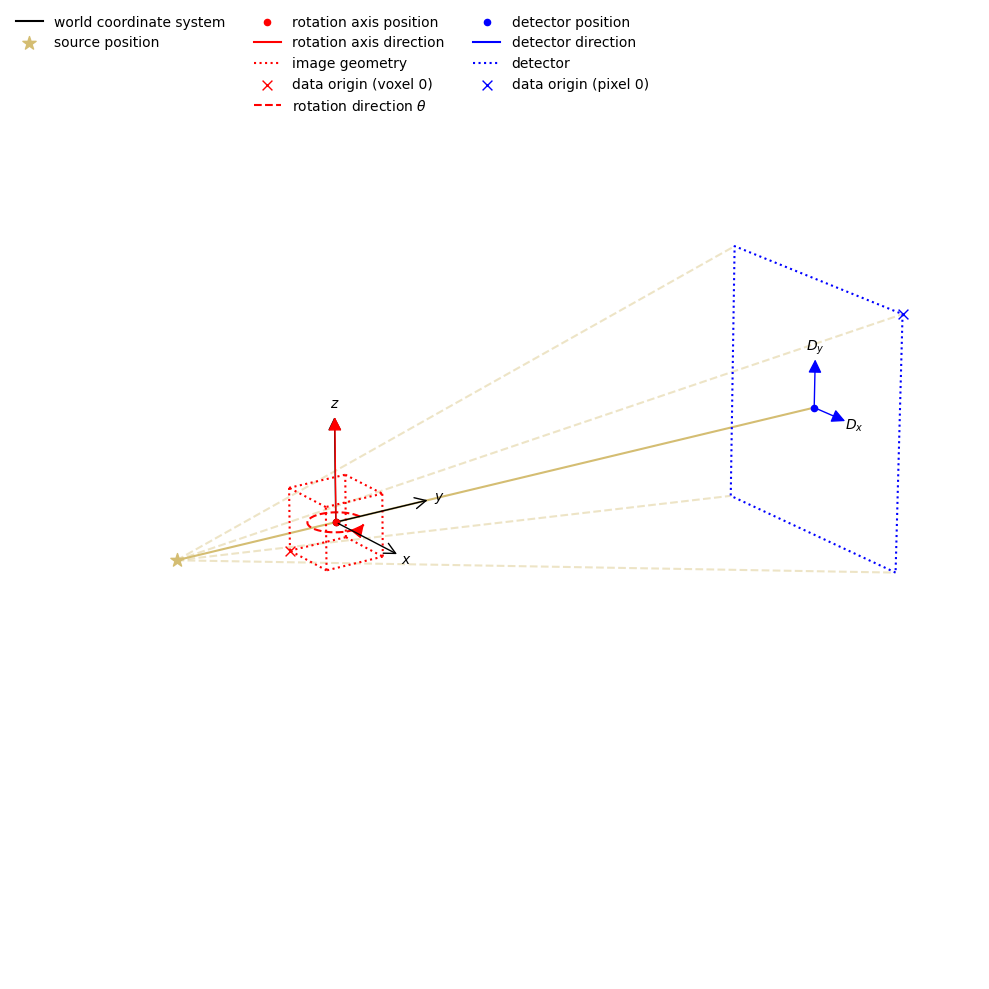

In [67]:
from cil.utilities.display import show_geometry
show_geometry(data.geometry)

And view a central projection of the data with `show2D()`

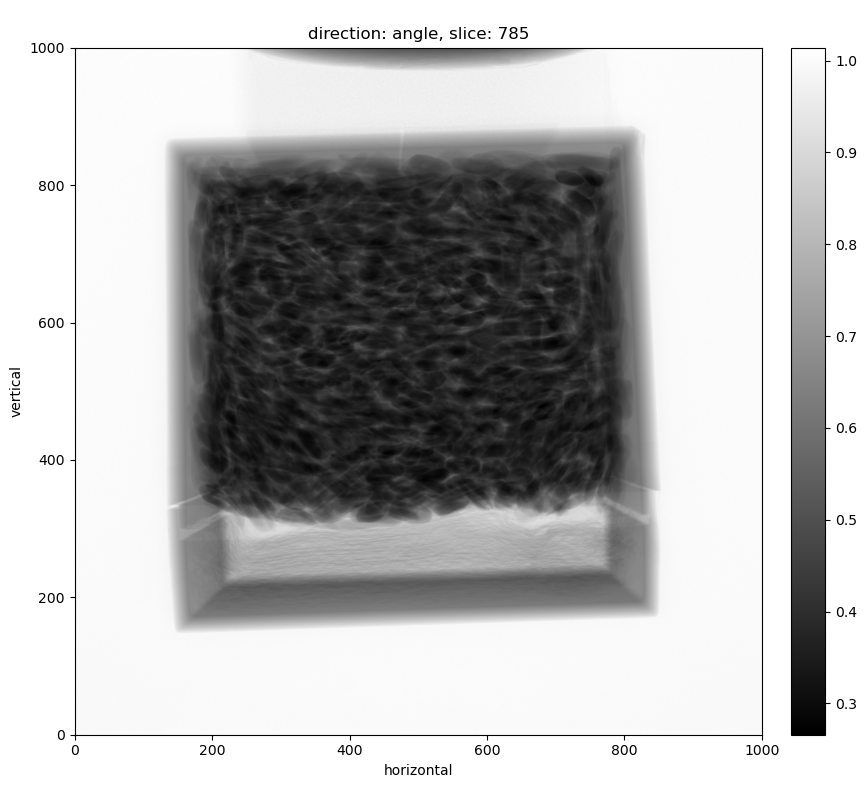

In [68]:
from cil.utilities.display import show2D
show2D(data)

By default the `NikonDataReader` argument `normalise` is `True`, which means all projections are loaded and normalised by the detector white level, which is stored in the .xtekct file as WhiteLevel. If you want to load the data without normalisation, specify `normalise=False`

In [69]:
file_name = Path(data_dir) / 'korn/Korn i kasse/47209 testscan korn01_recon.xtekct'
data_reader = NikonDataReader(file_name=file_name, normalise=False)
data = data_reader.read()

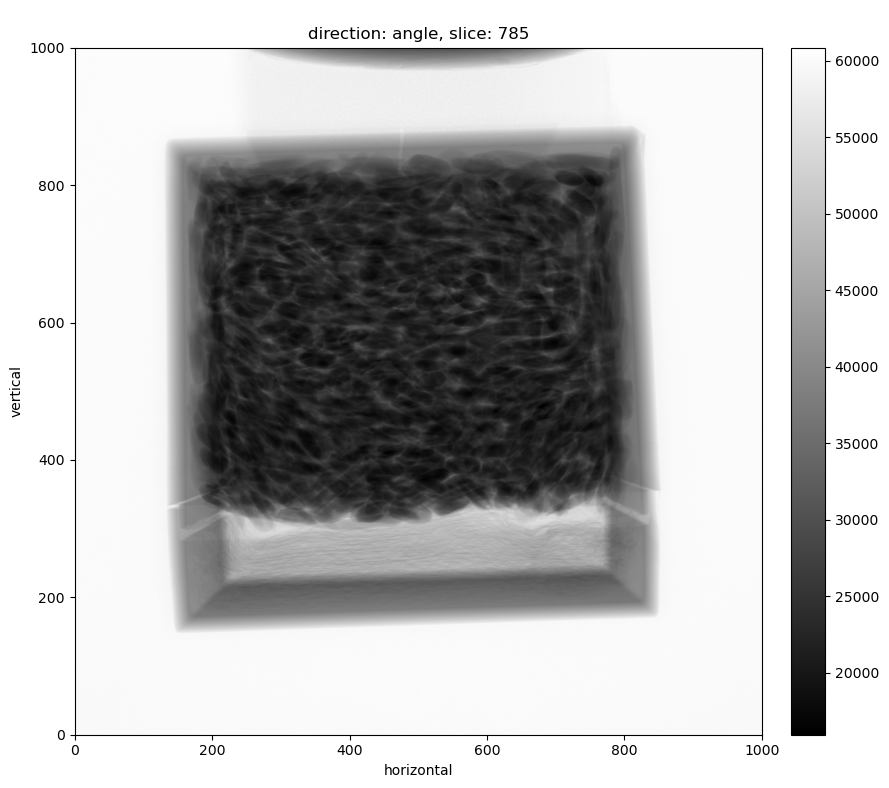

In [70]:
show2D(data)

Use the `roi` argument to load a subset of the data. `roi`should be passed as a dictionary e.g. `{'axis_labels_1': (start, end, step),'axis_labels_2': (start, end, step)}` with axis labels that describe the data dimension labels

To load a cropped subset of the data, change the start and end values. 'axis_label': -1 is a shortcut to load all elements along the axis.

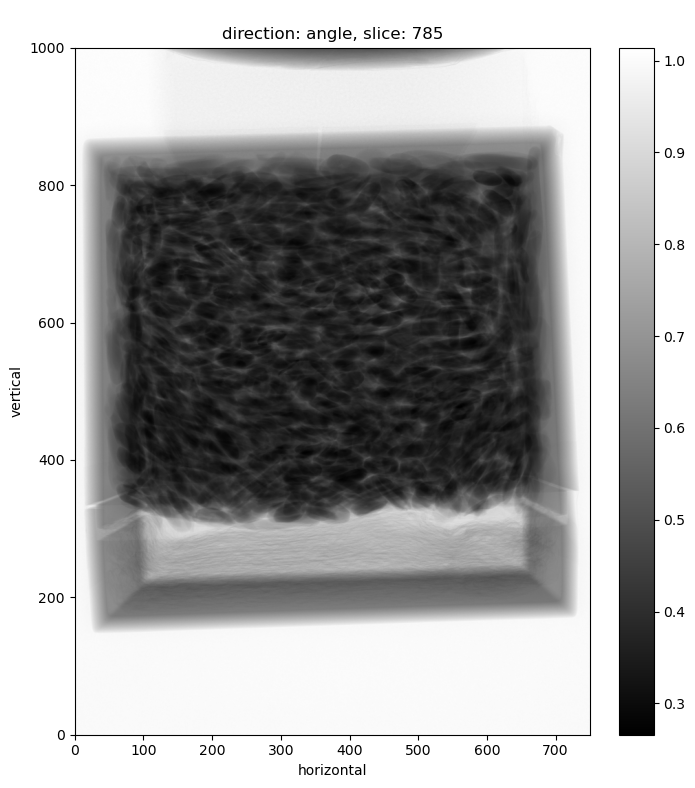

In [71]:
roi = {'horizontal':(120, 870, 1), 'vertical':-1}
data_reader = NikonDataReader(file_name=file_name, roi=roi)
data = data_reader.read()
show2D(data)

To load a binned subset of the data, change the step value. Here we use different binning for the horizontal and vertical dimensions which results in a different aspect ratio

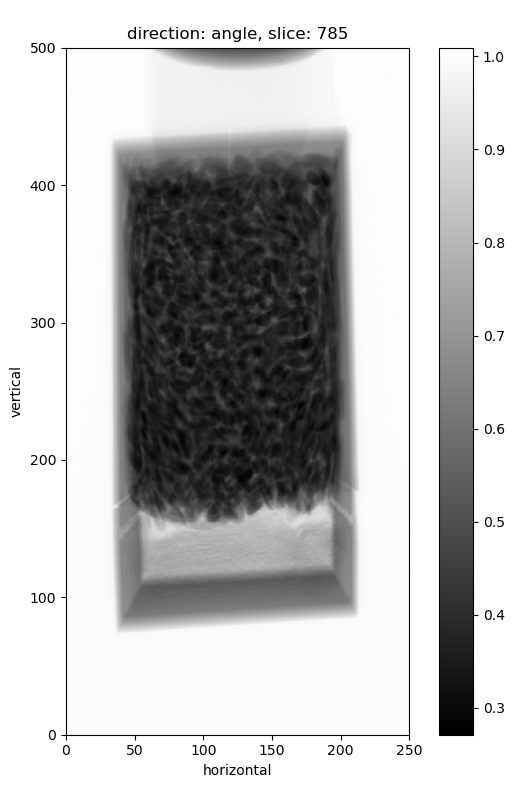

In [72]:
roi = {'horizontal':(None, None, 4), 'vertical':(None, None, 2)}
data_reader = NikonDataReader(file_name=file_name, roi=roi)
data = data_reader.read()
show2D(data)

We can also use the argument `fliplr=True` to flip all projections in the vertical axis. If we enable this option we see that the projection is flipped in the left-right direction/

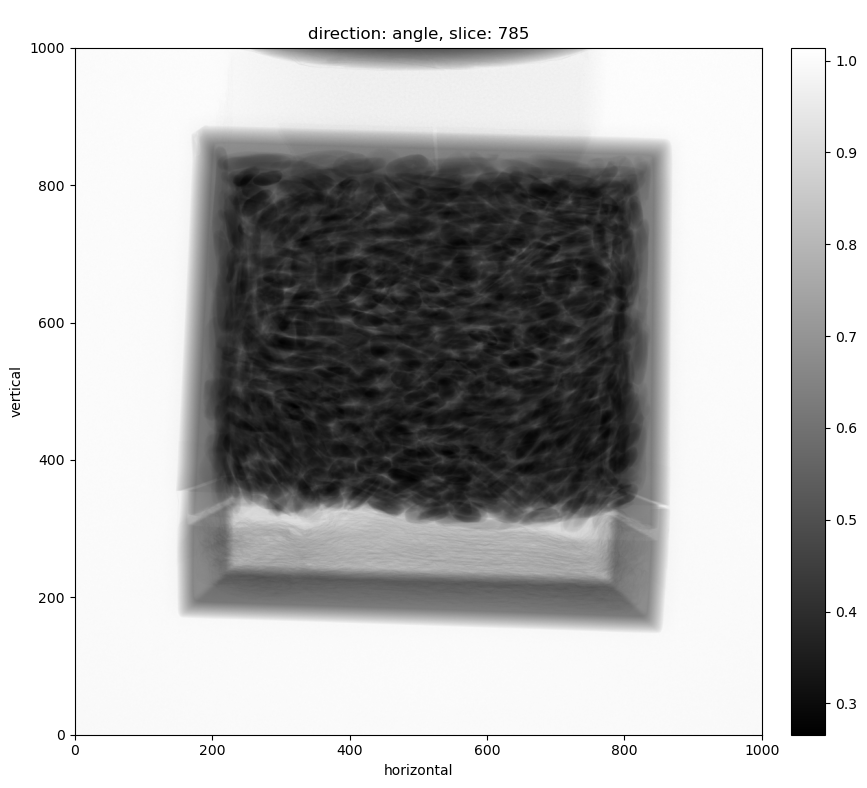

In [73]:
data_reader = NikonDataReader(file_name=file_name, fliplr=True)
data = data_reader.read()
show2D(data)

Sometimes we might want to load the geometry from the Nikon file without loading the data, for example if we want to load the raw data files separately and use the geometry from the .xtekct file. We can do this by instantiating the data reader and calling `get_geometry()`

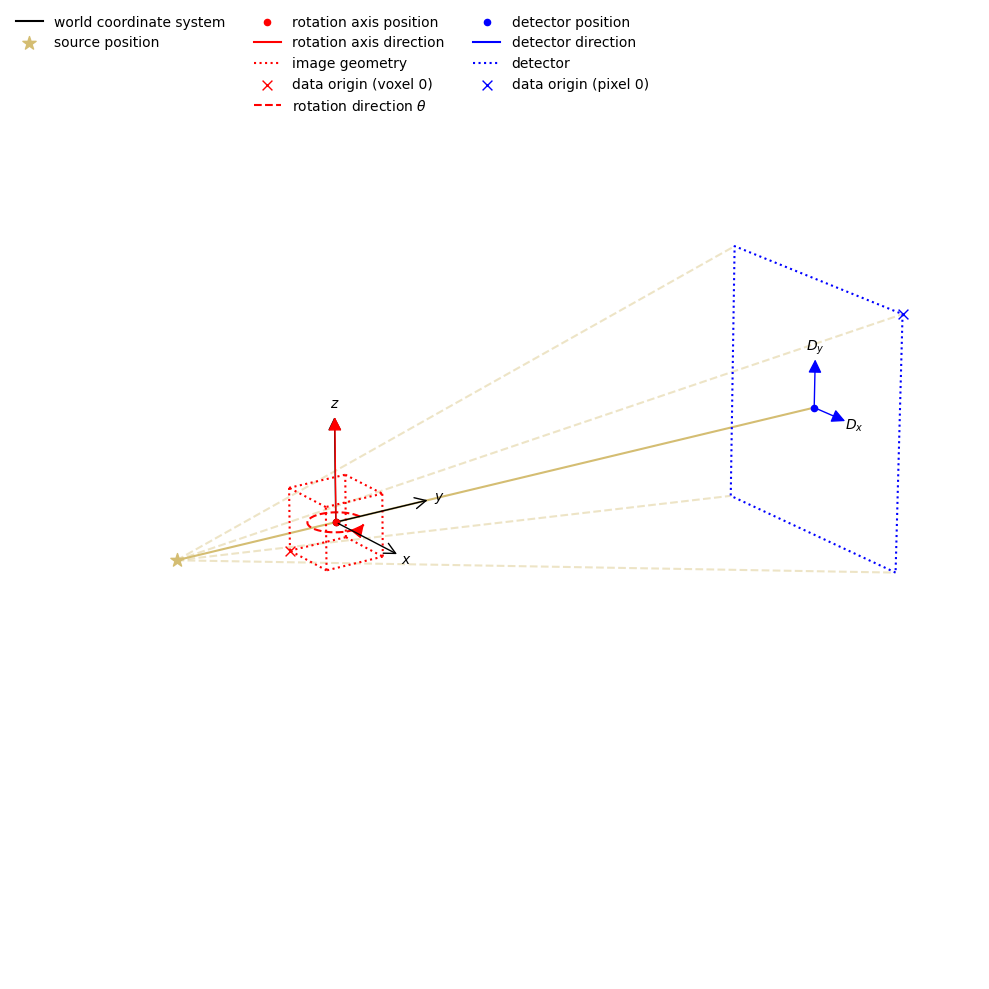

In [74]:
data_reader = NikonDataReader(file_name=file_name)
ag = data_reader.get_geometry()
show_geometry(ag)